In [1]:
import glob
import os
from laspec import mrs

from astropy.table import Table
import astropy.units as u
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from laspec.mrs import MrsSpec
import random

import seaborn as sns

import dustmaps
from dustmaps.config import config


config['data_dir'] = "/Users/liujunhui/Desktop/2021workMac/202111012totallynew/dustmaps"


In [2]:
import dustmaps.bayestar

dustmaps.bayestar.fetch()

from dustmaps.bayestar import BayestarQuery

bayestar = BayestarQuery(version='bayestar2019')


Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.
Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 69.561 s
  pix_info:   0.825 s
   samples:  49.179 s
      best:   8.407 s
       nan:   1.026 s
      sort:   9.863 s
       idx:   0.262 s


In [3]:
from astropy.coordinates import SkyCoord, Distance
from astropy import units


dir_name = './20211205_GaiaEDR3_3arcsec.csv'
m8pd = pd.read_csv(dir_name)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
c = SkyCoord(m8pd['combined_ra_obs'], m8pd['combined_dec_obs'], unit = 'deg')
d = 1000/m8pd['parallax'].values * units.pc

d[d<0] =0

coords = SkyCoord(c.galactic.l, c.galactic.b, distance = d, frame='galactic')

ebv = bayestar(coords, mode = 'median')

"""
Filter     G          G_BP      G_RP      B_T     V_T     J            H         Ks
?eff(?) 6437.70     5309.57   7709.85  4265.42  5332.38  12329.79   16395.59   21522.05
A?/AV   0.85926     1.06794   0.65199  1.35552  1.05047  0.29434    0.18128    0.11838
"""

AG = ebv*0.85926
ABP = ebv*1.06794
ARP = ebv*0.65199
AJ = ebv*0.29434
AH = ebv*0.18128
AK = ebv*0.11838

#%% absolute magnitude
dm = 5*np.log10(1000/m8pd['parallax']) - 5
MG = m8pd['phot_g_mean_mag'] - dm -AG
MBP = m8pd['phot_bp_mean_mag'] - dm -ABP
MRP = m8pd['phot_rp_mean_mag'] - dm -ARP

MBP_RP = MBP - MRP

<ipython-input-4-8cf6174a3337>:2: RuntimeWarning: divide by zero encountered in true_divide
  d = 1000/m8pd['parallax'].values * units.pc
/opt/anaconda3/lib/python3.8/site-packages/dustmaps/bayestar.py:436: RuntimeWarning: divide by zero encountered in log10
  dm = 5. * (np.log10(d) + 2.)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


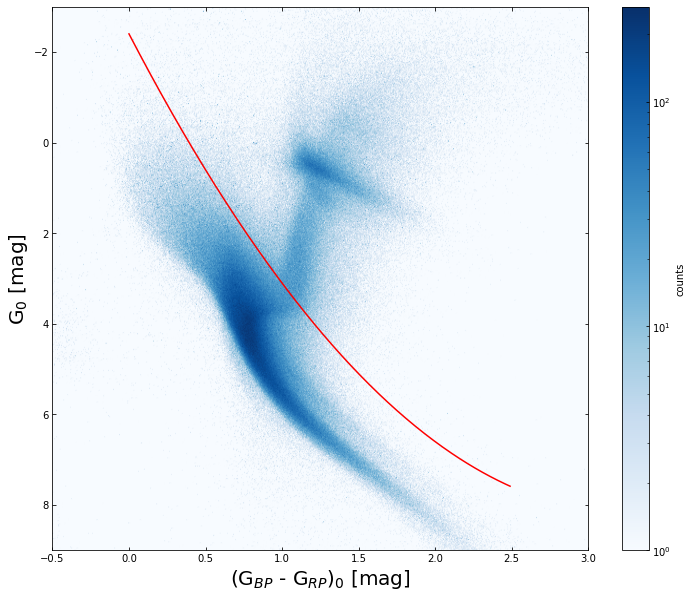

In [66]:
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import numpy as np
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.right'] = 'True'
mpl.rcParams['xtick.top'] = 'True'



#xlim = x.min(),x.max()
#ylim = y.min(),y.max()

fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (12,10))


hb = ax.hexbin(MBP_RP, MG, gridsize=2500 , bins = 'log', cmap='Blues')
#ax.set(xlim=xlim, ylim=ylim)
#ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax, label='counts')



plt.xlim(-0.5, 3)
plt.ylim(9, -3)
plt.xlabel('(G$_{BP}$ - G$_{RP}$)$_{0}$ [mag]', fontsize = 20)
plt.ylabel('G$_{0}$ [mag]', fontsize = 20)

x_range = np.arange(0, 2.5, 0.01)

y_range = -(x_range)**2 + 6.5 * x_range - 2.4

ax.plot(x_range, y_range, 'r-')

plt.show()